In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

train = pd.read_csv('C:/Users/plomo/bike-sharing-demand/train.csv')
test = pd.read_csv('C:/Users/plomo/bike-sharing-demand/test.csv')

In [24]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [25]:
train.shape

(10886, 12)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [27]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [28]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

C:\Users\plomo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


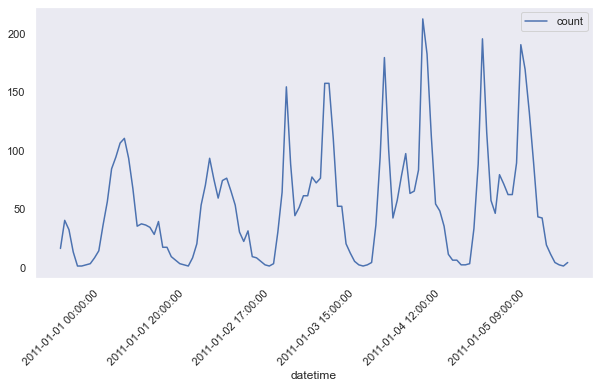

In [29]:
#시간별 자전거 대여량
train[:120].plot(x='datetime', y='count', figsize=(10, 5))
plt.xticks(rotation=45)
plt.grid()

C:\Users\plomo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

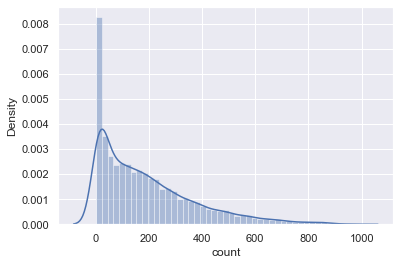

In [30]:
#대여 횟수 정도
sns.distplot(train['count'])

In [32]:
#casual, registered 필요없음
train = train.drop(['casual', 'registered'], axis=1)

In [34]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [35]:
train.datetime=pd.to_datetime(train.datetime)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [43]:
train['year']=train.datetime.dt.year
train['month']=train.datetime.dt.month
train['day']=train.datetime.dt.day
train['hour']=train.datetime.dt.hour

In [44]:
train = train.drop('datetime', axis=1)

Text(0.5, 1.0, 'count vs month')

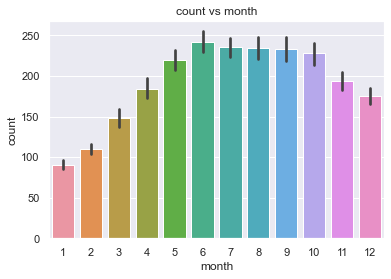

In [45]:
#월별 자전거 대여량
sns.barplot(x='month', y='count', data=train)
plt.title('count vs month')

Text(0.5, 1.0, 'count vs hours')

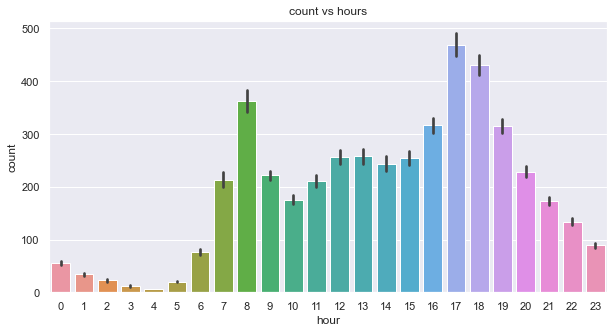

In [46]:
#시간별 자전거 대여량
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='count', data=train)
plt.title('count vs hours')

<AxesSubplot:xlabel='holiday', ylabel='count'>

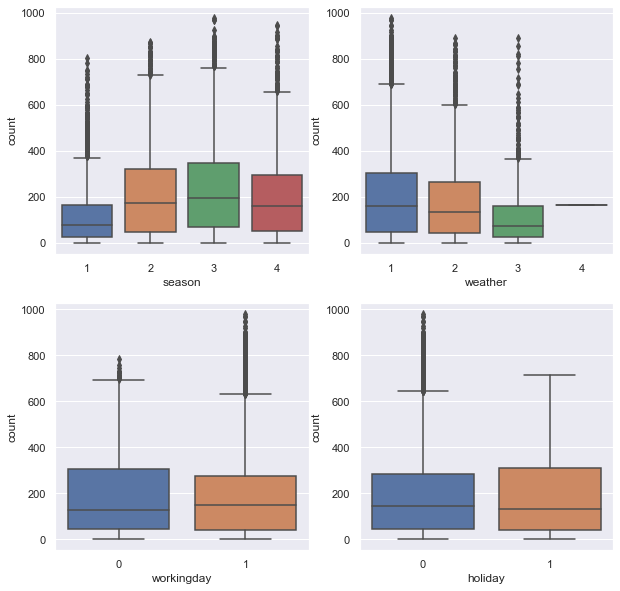

In [47]:
figure, axes = plt.subplots(2, 2)
figure.set_size_inches(10, 10)

plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='count', data=train)
plt.subplot(2, 2, 2)
sns.boxplot(x='weather', y='count', data=train)
plt.subplot(2, 2, 3)
sns.boxplot(x='workingday', y='count', data=train)
plt.subplot(2, 2, 4)
sns.boxplot(x='holiday', y='count', data=train)

In [49]:
numeric_features = ['temp', 'humidity', 'atemp', 'windspeed']
scaled_features = {}
for i in numeric_features:
    mean, std = train[i].mean(), train[i].std()
    scaled_features[i] = [mean, std]
    train.loc[:,i] = (train[i]-mean)/std

In [50]:
dummy_feilds = ['season', 'weather', 'hour', 'month']
for i in dummy_feilds:
    dummies = pd.get_dummies(train[i], prefix=i, drop_first=False)
    train=pd.concat([train, dummies], axis=1)

In [53]:
drop = train.drop(dummy_feilds, axis=1)
train.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,0,1,-1.333599,-1.092687,0.993167,-1.567682,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,-1.438841,-1.182367,0.941206,-1.567682,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,-1.438841,-1.182367,0.941206,-1.567682,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,-1.333599,-1.092687,0.681399,-1.567682,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,-1.333599,-1.092687,0.681399,-1.567682,1,2011,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,2,-1.333599,-1.271456,0.681399,-0.832404,1,2011,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,-1.438841,-1.182367,0.941206,-1.567682,2,2011,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,-1.544083,-1.271456,1.252975,-1.567682,3,2011,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,1,-1.333599,-1.092687,0.681399,-1.567682,8,2011,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,-0.912633,-0.735148,0.733360,-1.567682,14,2011,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
x=train.drop('count', axis=1)
y=train['count']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [59]:
x_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2565,2,0,1,1,0.771234,0.873778,-0.617638,1.371787,2011,6,...,0,0,0,1,0,0,0,0,0,0
9934,4,0,1,1,-0.281183,-0.198839,1.356898,0.514237,2012,10,...,0,0,0,0,0,0,0,1,0,0
9913,4,0,1,2,-0.175941,-0.109750,0.265707,-1.567682,2012,10,...,0,0,0,0,0,0,0,1,0,0
10662,4,0,1,2,0.034542,0.069020,1.356898,-0.710132,2012,12,...,0,0,0,0,0,0,0,0,0,1
7144,2,1,0,1,0.665992,0.784688,-0.046062,1.371787,2012,4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,2,0,0,1,0.981718,0.963457,0.629437,-0.832404,2011,6,...,0,0,0,1,0,0,0,0,0,0
9612,4,0,1,1,0.665992,0.784688,0.369630,-1.567682,2012,10,...,0,0,0,0,0,0,0,1,0,0
2273,2,0,1,1,1.613168,1.231317,-2.124520,1.617153,2011,6,...,0,0,0,1,0,0,0,0,0,0
8519,3,0,1,1,1.297443,1.320996,0.213746,-0.710132,2012,7,...,0,0,0,0,1,0,0,0,0,0


In [60]:
y_train

2565     386
9934     508
9913     228
10662    345
7144      28
        ... 
2668      72
9612     321
2273     188
8519     667
9575     809
Name: count, Length: 8708, dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [62]:
models=[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor()]
model_names = ['linear Regressor', 'Randomforest Regressor', 'Kneighbors Regressor']
rmse = []
accuracy = []
d = {}
for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred=clf.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    accuracy.append(clf.score(x_test, y_test))
d = {'Modeling Algo':model_names, 'RMSE':rmse, 'Accuracy':accuracy}

In [63]:
data = pd.DataFrame(d)

In [64]:
data

,Modeling Algo,RMSE,Accuracy
0,linear Regressor,98.854622,0.701608
1,Randomforest Regressor,44.290280,0.940102
2,Kneighbors Regressor,81.840824,0.795481


# prediction

In [65]:
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

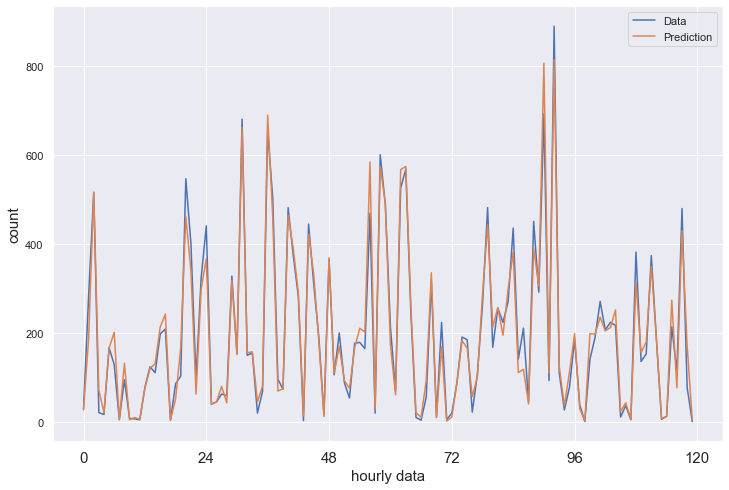

In [66]:
plt.figure(figsize=(12, 8))
y_test=y_test.reset_index(drop=True)
plt.plot(y_test[0:24*5], label='Data')
plt.plot(y_pred[0:24*5], label='Prediction')
plt.xticks([0, 24, 48, 72, 96, 120], size=15)
plt.xlabel('hourly data', size=15)
plt.ylabel('count', size=15)
plt.legend()